In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalMaxPooling2D

In [ ]:
dataset = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test,y_test) = dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
def resize(x, dims=[32,32], n_channels = 3):
  x = np.expand_dims(x, axis=-1)
  x = np.repeat(x, n_channels, axis=-1)
  #Scaling
  x = x.astype("float32")/255
  #resizing
  x = tf.image.resize(x, dims)
  return x

In [ ]:
x_train = resize(x_train)
x_test = resize(x_test)

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#Data Augument.
data_augument = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.5)
])

In [ ]:
#Creating train_set --consist of both x and y
train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_set = train_set.batch(32).map(lambda x, y: (data_augument(x), y))

In [ ]:
n_class = len(set(y_train))
n_class

10

In [ ]:
input = Input(shape=(32,32,3))
base_model = tf.keras.applications.ResNet50(weights="imagenet",
                                            include_top=False,
                                            input_tensor=input)
#Layers.
x = GlobalMaxPooling2D()(base_model.output)
x = Dense(64, activation="relu", use_bias=True)(x)
x = Dense(n_class, activation="softmax")(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

In [ ]:
#model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
for _ in base_model.layers:
  _.trainable = False

In [ ]:
r = model.fit(train_set, epochs=1)

1875/1875 [==============================] - 132s 45ms/step - loss: 0.9489 - accuracy: 0.6582


In [ ]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_1                33: conv2_block3_2_bn      66: conv3_block3_2_relu    99: conv4_block2_3_conv   
  1: conv1_pad              34: conv2_block3_2_relu    67: conv3_block3_3_conv   100: conv4_block2_3_bn     
  2: conv1_conv             35: conv2_block3_3_conv    68: conv3_block3_3_bn     101: conv4_block2_add      
  3: conv1_bn               36: conv2_block3_3_bn      69: conv3_block3_add      102: conv4_block2_out      
  4: conv1_relu             37: conv2_block3_add       70: conv3_block3_out      103: conv4_block3_1_conv   
  5: pool1_pad              38: conv2_block3_out       71: conv3_block4_1_conv   104: conv4_block3_1_bn     
  6: pool1_pool             39: conv3_block1_1_conv    72: conv3_block4_1_bn     105: conv4_block3_1_relu   
  7: conv2_block1_1_conv    40: conv3_block1_1_bn      73: conv3_block4_1_relu   106: conv4_block3_2_conv   
  8: conv2_block1_1_bn      41: conv3_block1_1_relu    74: conv3_block4_2_conv   107: conv4_block3_2_bn     
  9: conv2_block1_1

In [ ]:
for layer in base_model.layers[56:]:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(train_set, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 94s 36ms/step - loss: 0.6624 - accuracy: 0.7675
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5523 - accuracy: 0.8002
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.5149 - accuracy: 0.8138
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4915 - accuracy: 0.8197
Epoch 5/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4643 - accuracy: 0.8286


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(train_set, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 120s 45ms/step - loss: 0.5565 - accuracy: 0.8005
Epoch 2/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4807 - accuracy: 0.8228
Epoch 3/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.4652 - accuracy: 0.8292
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.6063 - accuracy: 0.7807
Epoch 5/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.5578 - accuracy: 0.7952


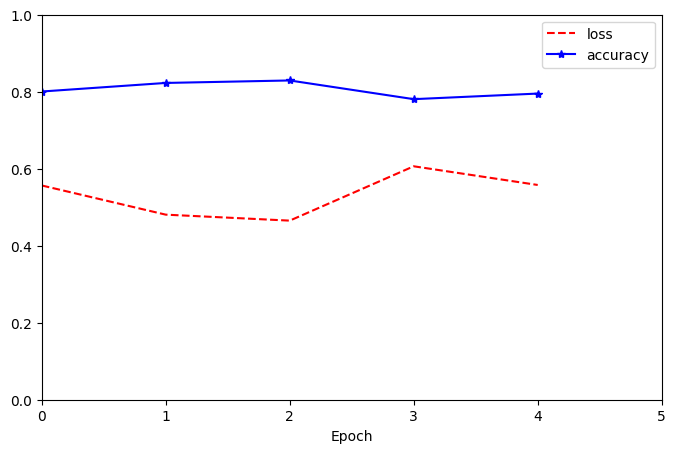

In [ ]:
pd.DataFrame(r.history).plot(figsize=(8,5), xlim=[0,5], ylim=[0,1],
                             xlabel="Epoch", style=["r--", "b-*"])
plt.show()

# Testing

In [ ]:
model.evaluate(x_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
y_pred = model.predict(x_test)
y_predicted = []
for _ in range(len(y_pred)):
  y_predicted.append(np.argmax(y_pred[_]))


313/313 [==============================] - 4s 10ms/step


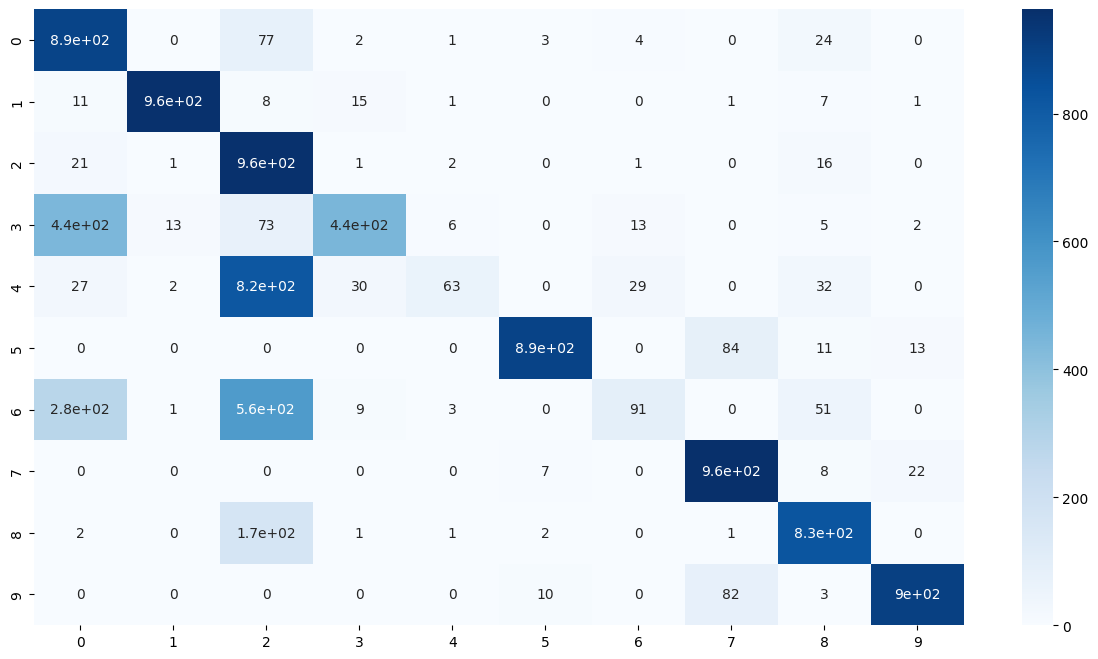

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(15,8))
sns.heatmap(cm, cmap="Blues", annot=True)
plt.show()